In [1]:
import sys
import sklearn
import numpy as np
import os
import tarfile
import urllib
import pandas as pd  #provides a dataframe
import urllib.request
import seaborn as sns  
import folium  #For plotting Choropleth Map


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [2]:
# For graph plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get Data

In [3]:
COVID19_US = pd.read_csv('/Users/emmanueljumbo/dataScience/python/Dissertation/experimentation/data/Ultimate_Covid19_DataSet.csv')


In [4]:
COVID19_US = COVID19_US.drop("Unnamed: 0", axis=1)
COVID19_US['Date'] = pd.to_datetime(COVID19_US['Date'])

pd.set_option("display.max_columns", None)   # Lets you see ALL dataframe ROW.

In [5]:
COVID19_US.tail()

,Date,State_Abr,State,County,FIPS,Metro_Status,Population,Confirmed_Cases,Deaths,Lat,Long_,AREA_SQMI,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_AGE65,E_AGE17,E_MINRTY,E_UNINSUR,EP_POV,EP_UNEMP,EP_PCI,EP_AGE65,EP_AGE17,EP_MINRTY,EP_UNINSUR,Series_Complete_Pop_Pct,Series_Complete_Yes,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,critical_staffing_shortage_today_yes,inpatient_beds_utilization,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator
2241955,2022-01-04,WY,Wyoming,Sweetwater,56037.0,Nonmetro,42343,8388,110,41.659439,-108.882788,10426.975725,19628.0,15871.0,5237.0,1213.0,32624.0,4721.0,11809.0,9010.0,5240.0,12.0,5.2,32624.0,10.7,26.8,20.4,12.0,44.3,18745.0,96.5,23320.0,55.1,23316.0,59.0,6555.0,35.0,1021682.0,458276.0,54517.0,2672.0,0.437422,455583.0,1002115.0,0.098529,54306.0,449435.0,0.042921,54268.0,982798.0,30632.0,12366.0,12022.0,51539.0,0.129771,12350.0,66300.0,0.437956,30631.0,70427.0
2241956,2022-01-04,WY,Wyoming,Teton,56039.0,Nonmetro,23464,6452,14,43.935225,-110.589080,3996.844622,13680.0,9158.0,1619.0,210.0,53703.0,3135.0,4434.0,4246.0,2305.0,7.1,1.4,53703.0,13.6,19.2,18.4,10.0,88.7,20821.0,96.5,24074.0,95.0,24072.0,95.0,7825.0,37.6,1021682.0,458276.0,54517.0,2672.0,0.437422,455583.0,1002115.0,0.098529,54306.0,449435.0,0.042921,54268.0,982798.0,30632.0,12366.0,12022.0,51539.0,0.129771,12350.0,66300.0,0.437956,30631.0,70427.0
2241957,2022-01-04,WY,Wyoming,Uinta,56041.0,Nonmetro,20226,4191,34,41.287818,-110.547578,2081.719807,8972.0,7735.0,2552.0,614.0,27009.0,2498.0,6071.0,2567.0,2499.0,12.5,6.1,27009.0,12.1,29.5,12.5,12.2,46.3,9368.0,96.5,11156.0,55.2,11156.0,59.1,3140.0,33.5,1021682.0,458276.0,54517.0,2672.0,0.437422,455583.0,1002115.0,0.098529,54306.0,449435.0,0.042921,54268.0,982798.0,30632.0,12366.0,12022.0,51539.0,0.129771,12350.0,66300.0,0.437956,30631.0,70427.0
2241958,2022-01-04,WY,Wyoming,Washakie,56043.0,Nonmetro,7805,1892,39,43.904516,-107.680187,2238.672972,3868.0,3422.0,984.0,253.0,27556.0,1686.0,1942.0,1463.0,1223.0,12.4,6.2,27556.0,20.7,23.9,18.0,15.4,40.3,3147.0,96.5,3460.0,44.3,3459.0,46.7,1355.0,43.1,1021682.0,458276.0,54517.0,2672.0,0.437422,455583.0,1002115.0,0.098529,54306.0,449435.0,0.042921,54268.0,982798.0,30632.0,12366.0,12022.0,51539.0,0.129771,12350.0,66300.0,0.437956,30631.0,70427.0
2241959,2022-01-04,WY,Wyoming,Weston,56045.0,Nonmetro,6927,1257,16,43.839612,-104.567488,2398.003891,3565.0,3062.0,1171.0,117.0,29152.0,1340.0,1505.0,634.0,898.0,17.4,3.5,29152.0,18.9,21.2,8.9,13.3,34.7,2401.0,96.5,2693.0,38.9,2691.0,40.9,986.0,41.1,1021682.0,458276.0,54517.0,2672.0,0.437422,455583.0,1002115.0,0.098529,54306.0,449435.0,0.042921,54268.0,982798.0,30632.0,12366.0,12022.0,51539.0,0.129771,12350.0,66300.0,0.437956,30631.0,70427.0


# Create DataSet
Eleminate Timeseries Feature from dataset

In [6]:
C19_View = COVID19_US.loc[COVID19_US["Date"] == "2022-01-04",:]

C19_View = C19_View.reset_index()
C19_View = C19_View.drop("index", axis=1)



#                     What And Why:
# Creation of a new dataframe using cumulative data for the most recent date in the dataframe.
# It was necessary to reset the index, cause the original index values were copied into the new dataframe, thereby resulting in a mismash of random index numbers
# Then delete the old index

# IDEA FROM= 
#reset_index= https://www.geeksforgeeks.org/pandas-how-to-reset-index-in-a-given-dataframe/


#### Find Averages (Rates/ Percentages)

In [7]:
#Percentage Of The Population ________




#                             AVERAGE
#Population_Density (Population/ land Area)
C19_View['Population_Density'] = C19_View['Population'] / C19_View['AREA_SQMI']
# ---------
#Death
C19_View['Death'] = C19_View['Deaths'] / C19_View['Population']
#Cases
C19_View['Cases'] = C19_View['Confirmed_Cases'] / C19_View['Population']
# --------- VAXX
## Rename Columns
C19_View.rename(columns={'Series_Complete_Pop_Pct': 'Vaxx_pct', 'Administered_Dose1_Pop_Pct': 'Dose1_pct', 'Booster_Doses_Vax_Pct': 'Vaxx_Booster_pct'}, inplace=True)
# ##Fully Vaccined
# C19_View['Vaxx'] = C19_View['Series_Complete_Yes'] / C19_View['Population']
# ##At least one Vaccine Dose
# C19_View['Dose1'] = C19_View['Administered_Dose1_Recip'] / C19_View['Population']
# ##Fully Vaccined + Booster
# C19_View['Vaxx_Booster'] = C19_View['Booster_Doses'] / C19_View['Population']
# ---------
#Inpatient_beds_utilization = (sum of inpatient_beds_used / Sum of "inpatient_beds" available)
C19_View['Beds_utilization'] = C19_View['inpatient_beds_utilization_numerator'] / C19_View['inpatient_beds_utilization_denominator']
#percent_of_inpatients_with_covid = (sum of"inpatient_beds_used_covid" /  Sum of "inpatient_beds_used" by everyone)
C19_View['Bed_covid_pct'] = C19_View['percent_of_inpatients_with_covid_numerator'] / C19_View['percent_of_inpatients_with_covid_denominator']
#inpatient_bed_covid_utilization = (Sum of "inpatient_beds_used_covid"/  Sum of "inpatient_beds" available)
C19_View['Bed_covid_utilization'] = C19_View['inpatient_bed_covid_utilization_numerator'] / C19_View['inpatient_bed_covid_utilization_denominator']
#adult_icu_bed_covid_utilization = (Sum of 'staffed_icu_adult_patients_confirmed_and_suspected_covid' / Sum of "total_staffed_adult_icu_beds )
C19_View['ICU_bed_covid_Adult_UTIL'] = C19_View['adult_icu_bed_covid_utilization_numerator'] / C19_View['adult_icu_bed_covid_utilization_denominator']
#adult_icu_bed_utilization = (staffed_adult_icu_bed_occupancy / total_staffed_adult_icu_beds)
C19_View['ICU_bed_Adult_UTIL'] = C19_View['adult_icu_bed_utilization_numerator'] / C19_View['adult_icu_bed_utilization_denominator']


# NEW_inpatient_beds_utilization         =Beds_utilization
# NEW_percent_of_inpatients_with_covid   =Bed_covid_pct
# NEW_inpatient_bed_covid_utilization    =Bed_covid_utilization
# NEW_adult_icu_bed_covid_utilization    =ICU_bed_covid_Adult_UTIL 
# NEW_adult_icu_bed_utilization          =ICU_bed_Adult_UTIL



#                             PERCENTAGE
# #Cases
# C19_View['Cases_pct'] = C19_View['Cases'] * 100
# #Death
# C19_View['Death_pct'] = C19_View['Death'] * 100
# ---------
# ##Fully Vaccined
# C19_View['Vaxx_pct'] = C19_View['Vaxx'] * 100
# ##At least one Vaccine Dose
# C19_View['Dose1_pct'] = C19_View['Dose1'] * 100
# ##Fully Vaccined + Booster
# C19_View['Vaxx_Booster_pct'] = C19_View['Vaxx_Booster'] * 100
# ---------
# ##Hospitalization Vaccined
C19_View['Bed_covid_pct'] = C19_View['Bed_covid_pct'] * 100


#                             PERCENTAGE per 100k
#Cases
C19_View['Cases_pct'] = C19_View['Cases'] * 100000
#Death
C19_View['Death_pct'] = C19_View['Death'] * 100000




#                          What And Why
#          [How the above was calculated & Formula References]
#Population_Density= https://www.nationalgeographic.org/activity/calculating-population-density/
#Death_pct= https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section3.html
#Vaxx = All Formulas used are from the same source as dataset.
#Beds = All Formulas used are from the same source as dataset. {Why re-calculate bed percentages}= Cause All 
#       bed variables were changed from nonCumulative to Cumulative.


#### DROP Columns

In [8]:
# Drop All Hospital bed Columns Until, Data Cumulation issues can be resolved or dataset Replaced 
# C19_View = C19_View.drop(C19_View.loc[:, "critical_staffing_shortage_today_yes":"inpatient_bed_covid_utilization"].columns, axis = 1)


#            Primary Removable Column (Percents Columns No longer wanted)
# C19_View = C19_View.drop("Series_Complete_Pop_Pct", axis=1)
C19_View = C19_View.drop("Completeness_pct", axis=1)
# C19_View = C19_View.drop("Administered_Dose1_Pop_Pct", axis=1)
C19_View = C19_View.drop("Administered_Dose1_Recip_5Plus", axis=1)
C19_View = C19_View.drop("Administered_Dose1_Recip_5PlusPop_Pct", axis=1)
# C19_View = C19_View.drop("Booster_Doses_Vax_Pct", axis=1)




#            Additional Removable Column (can used to calculate Per 100k)
# C19_View = C19_View.drop("Series_Complete_Yes", axis=1)
C19_View = C19_View.drop("Administered_Dose1_Recip", axis=1)
C19_View = C19_View.drop("Booster_Doses", axis=1)
C19_View = C19_View.drop("E_POV", axis=1)
C19_View = C19_View.drop("E_UNEMP", axis=1)
C19_View = C19_View.drop("E_PCI", axis=1)
C19_View = C19_View.drop("E_AGE65", axis=1)
C19_View = C19_View.drop("E_AGE17", axis=1)
C19_View = C19_View.drop("E_MINRTY", axis=1)
C19_View = C19_View.drop("E_UNINSUR", axis=1)


#         Additional Removable Column ()
C19_View = C19_View.drop("Cases", axis=1)
C19_View = C19_View.drop("Death", axis=1)
# C19_View = C19_View.drop("Vaxx", axis=1)
# C19_View = C19_View.drop("Dose1", axis=1)
# C19_View = C19_View.drop("Vaxx_Booster", axis=1)







#  23  critical_staffing_shortage_today_yes                             3140 non-null   float64
#  33  staffed_adult_icu_bed_occupancy                                  3140 non-null   float64
#  34  staffed_icu_adult_patients_confirmed_and_suspected_covid         3140 non-null   float64
#  35  staffed_icu_adult_patients_confirmed_covid                       3140 non-null   float64
#  36  total_adult_patients_hospitalized_confirmed_and_suspected_covid  3140 non-null   float64


In [9]:
#Print

print("Shape:", C19_View.shape)
print( C19_View.info())
C19_View.head()

Shape: (3140, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 56 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             3140 non-null   datetime64[ns]
 1   State_Abr                                                        3140 non-null   object        
 2   State                                                            3140 non-null   object        
 3   County                                                           3140 non-null   object        
 4   FIPS                                                             3140 non-null   float64       
 5   Metro_Status                                                     3140 non-null   object        
 6   Population                                                    

,Date,State_Abr,State,County,FIPS,Metro_Status,Population,Confirmed_Cases,Deaths,Lat,Long_,AREA_SQMI,E_HU,E_HH,EP_POV,EP_UNEMP,EP_PCI,EP_AGE65,EP_AGE17,EP_MINRTY,EP_UNINSUR,Vaxx_pct,Series_Complete_Yes,Dose1_pct,Vaxx_Booster_pct,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,critical_staffing_shortage_today_yes,inpatient_beds_utilization,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,Population_Density,Beds_utilization,Bed_covid_pct,Bed_covid_utilization,ICU_bed_covid_Adult_UTIL,ICU_bed_Adult_UTIL,Cases_pct,Death_pct
0,2022-01-04,AL,Alabama,Autauga,1001.0,Metro,55869,11347,161,32.539527,-86.644082,594.443459,23315.0,21115.0,15.4,4.2,29372.0,14.6,24.2,25.0,7.1,38.6,21586.0,48.5,26.9,9385805.0,6802027.0,763894.0,16447.0,0.75256,6800917.0,9284182.0,0.130603,760635.0,6637765.0,0.098146,761575.0,9082896.0,725101.0,195411.0,186841.0,677240.0,0.158971,191543.0,822857.0,0.88417,725086.0,843164.0,93.985389,0.732527,11.459204,0.083847,0.232778,0.859958,20310.010918,288.174122
1,2022-01-04,AL,Alabama,Baldwin,1003.0,Metro,223234,40838,594,30.727750,-87.722071,1589.793007,111945.0,78622.0,10.6,4.4,31203.0,19.5,21.9,17.0,10.2,47.8,106608.0,60.6,28.2,9385805.0,6802027.0,763894.0,16447.0,0.75256,6800917.0,9284182.0,0.130603,760635.0,6637765.0,0.098146,761575.0,9082896.0,725101.0,195411.0,186841.0,677240.0,0.158971,191543.0,822857.0,0.88417,725086.0,843164.0,140.417022,0.732527,11.459204,0.083847,0.232778,0.859958,18293.808291,266.088499
2,2022-01-04,AL,Alabama,Barbour,1005.0,Nonmetro,24686,3999,81,31.868263,-85.387129,885.001636,11937.0,9186.0,28.9,9.5,18461.0,18.0,21.1,53.9,11.2,42.1,10385.0,51.8,23.7,9385805.0,6802027.0,763894.0,16447.0,0.75256,6800917.0,9284182.0,0.130603,760635.0,6637765.0,0.098146,761575.0,9082896.0,725101.0,195411.0,186841.0,677240.0,0.158971,191543.0,822857.0,0.88417,725086.0,843164.0,27.893734,0.732527,11.459204,0.083847,0.232778,0.859958,16199.465284,328.121202
3,2022-01-04,AL,Alabama,Bibb,1007.0,Metro,22394,4616,95,32.996421,-87.125115,622.461089,9161.0,6840.0,14.0,7.5,20199.0,16.3,20.7,25.4,7.9,32.9,7358.0,40.2,26.1,9385805.0,6802027.0,763894.0,16447.0,0.75256,6800917.0,9284182.0,0.130603,760635.0,6637765.0,0.098146,761575.0,9082896.0,725101.0,195411.0,186841.0,677240.0,0.158971,191543.0,822857.0,0.88417,725086.0,843164.0,35.976546,0.732527,11.459204,0.083847,0.232778,0.859958,20612.664106,424.220773
4,2022-01-04,AL,Alabama,Blount,1009.0,Metro,57826,11430,198,33.982109,-86.567906,644.830460,24222.0,20600.0,14.4,4.1,22656.0,17.8,23.4,12.9,11.0,29.7,17161.0,35.9,26.2,9385805.0,6802027.0,763894.0,16447.0,0.75256,6800917.0,9284182.0,0.130603,760635.0,6637765.0,0.098146,761575.0,9082896.0,725101.0,195411.0,186841.0,677240.0,0.158971,191543.0,822857.0,0.88417,725086.0,843164.0,89.676285,0.732527,11.459204,0.083847,0.232778,0.859958,19766.195137,342.406530


#### Convert Categorical Attribute
This is done to prep for future machine learning algorithms and numerical data visualisation

In [10]:
C19_View['Metro_Status'] = C19_View['Metro_Status'].map({'Metro' : 1, 'Nonmetro' : 0})
display(C19_View["Metro_Status"].value_counts()) #Returns the unique values of my Categorical attribuite

## sklearn OrdinalEncoder class is used to convert categorical values to numbers
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# cancerDF_encoded = ordinal_encoder.fit_transform(cancerDF)

0    1974
1    1166
Name: Metro_Status, dtype: int64

#### Outlier Handling

In [11]:
##               ----- FOR IDENTIFYING OUTLERIERS ----
EP_POV_Outlier = C19_View[C19_View['EP_POV'] < 0.001]
Population_Density_Outlier = C19_View[C19_View['Population_Density'] > 60000]

##               ----- SAVING NEW Outler-Free Dataset -----
C19_View = C19_View[C19_View['EP_POV'] > 0.001]
# C19_View = C19_View[C19_View['Population_Density'] < 30000]


#                     What And Why
# Scatter plot Diagram alerted me to the existance of "outliers" in my dataset, 
# as well as pointing me to the specific problematic columns.
#                    (EP_POV_Outlier):
# Outlier value with in "EP_POV_Outlier" was less than 0 and primarily affected 'EP_POV', 'EP_UNEMP' 
# and 'EP_PCI' values.
# --OUTLIER VALUE:-- non metro area of Rio Arriba county, New Mexico State 
#                   (Population_Density_Outlier):
# Outlier value for Population_Density attribute can Not be removed cause although it's really high
# the value is accurate.
# --OUTLIER VALUE:-- Metro area of New York county in New York State

In [12]:
# print("Outlier Shape:\n", EP_POV_Outlier.shape)
# EP_POV_Outlier.tail(40)

In [13]:
# C19_View.shape
# C19_View.describe()

#### Group Data into Metro and Non-Metro

In [14]:
##  Group Data into Metro and Non-Metro
## 'Metro' = 1 (blue)
## 'Nonmetro' = 0 (orange)
Metro_View = C19_View[C19_View["Metro_Status"] == 1]
NonMetro_View = C19_View[C19_View["Metro_Status"] == 0]
# NonMetro_View[Vaxx_Attributes].shape
# Metro_View[Vaxx_Attributes].shape

#### State Estimates (for Hospital Bed Attributes)

In [15]:
#Sum of all values(county) per state
State_Est = C19_View.State.unique()
Deaths_Est = C19_View.groupby(['State'])['Deaths'].sum()
Series_Complete_Yes_Est = C19_View.groupby(['State'])['Series_Complete_Yes'].sum() #new
Population_Est = C19_View.groupby(['State'])['Population'].sum()
#only Max value per state
Bed_covid_utilization_Est = C19_View.groupby(['State'])['Bed_covid_utilization'].max()
Bed_covid_pct_Est = C19_View.groupby(['State'])['Bed_covid_pct'].max()
Beds_utilization_Est = C19_View.groupby(['State'])['Beds_utilization'].max()
ICU_bed_Adult_UTIL_Est = C19_View.groupby(['State'])['ICU_bed_Adult_UTIL'].max()
ICU_bed_covid_Adult_UTIL_Est = C19_View.groupby(['State'])['ICU_bed_covid_Adult_UTIL'].max()

#Below 2 code fragments are for dataset Creation 
# Frgment1
Estimate_C19_View = list(zip(State_Est,
                          Deaths_Est,
                          Series_Complete_Yes_Est,
                          Population_Est, 
                          Bed_covid_utilization_Est, 
                          Bed_covid_pct_Est, 
                          Beds_utilization_Est, 
                          ICU_bed_Adult_UTIL_Est,
                          ICU_bed_covid_Adult_UTIL_Est))
# Frgment2
Estimate_C19_View = pd.DataFrame(Estimate_C19_View, columns = ['State_Est',
                                                               'Deaths_Est',
                                                               'Series_Complete_Yes_Est',
                                                               'Population_Est',
                                                               'Bed_covid_utilization_Est',
                                                               'Bed_covid_pct_Est',
                                                               'Beds_utilization_Est',
                                                               'ICU_bed_Adult_UTIL_Est',
                                                               'ICU_bed_covid_Adult_UTIL_Est'])


#####################################
# ##Death per 100k
Estimate_C19_View['Deaths_'] = Estimate_C19_View['Deaths_Est'] / Estimate_C19_View['Population_Est']
Estimate_C19_View['Death_pct_Est'] = Estimate_C19_View['Deaths_'] * 100000

# ##Fully Vaccined
Estimate_C19_View['Vaxx_'] = Estimate_C19_View['Series_Complete_Yes_Est'] / Estimate_C19_View['Population_Est']
Estimate_C19_View['Vaxx_pct_Est'] = Estimate_C19_View['Vaxx_'] * 100

# Deaths_Est
# Estimate_C19_View

#                     What And Why:
# IDEA FROM= 
# https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [16]:
##               ----- FOR IDENTIFYING OUTLERIERS ----
EP_POV_Outlier = Estimate_C19_View[Estimate_C19_View['Vaxx_pct_Est'] < 0.001]


##               ----- SAVING NEW Outler-Free Dataset -----
Estimate_C19_View = Estimate_C19_View[Estimate_C19_View['Vaxx_pct_Est'] > 0.001]


# EP_POV_Outlier.head()

#### Attribute Grouping

In [17]:
Vaxx_Attributes = ['Death_pct','Vaxx_pct','Dose1_pct','Vaxx_Booster_pct']

Other_Attributes = ['Death_pct','Lat','Population_Density']

SVI_Attributes = ['Death_pct', 'EP_POV', 'EP_UNEMP', 'EP_PCI', 'EP_MINRTY', 'EP_UNINSUR']

Hospital_Attributes = ['Cases_pct', 'Death_pct', 'Bed_covid_utilization', 'Bed_covid_pct', 
                    'Beds_utilization', 'ICU_bed_Adult_UTIL','ICU_bed_covid_Adult_UTIL']

Hospital_Attributes_Est = ['State_Est', 'Death_pct_Est', 'Vaxx_pct_Est',
                                                               'Bed_covid_utilization_Est',
                                                               'Bed_covid_pct_Est',
                                                               'Beds_utilization_Est',
                                                               'ICU_bed_Adult_UTIL_Est',
                                                               'ICU_bed_covid_Adult_UTIL_Est']

# Scatter Plot Matrix

#### All Areas Attributes (ScatterPlot)

Text(0.5, 0.98, 'All Areas Attributes (ScatterPlot)')

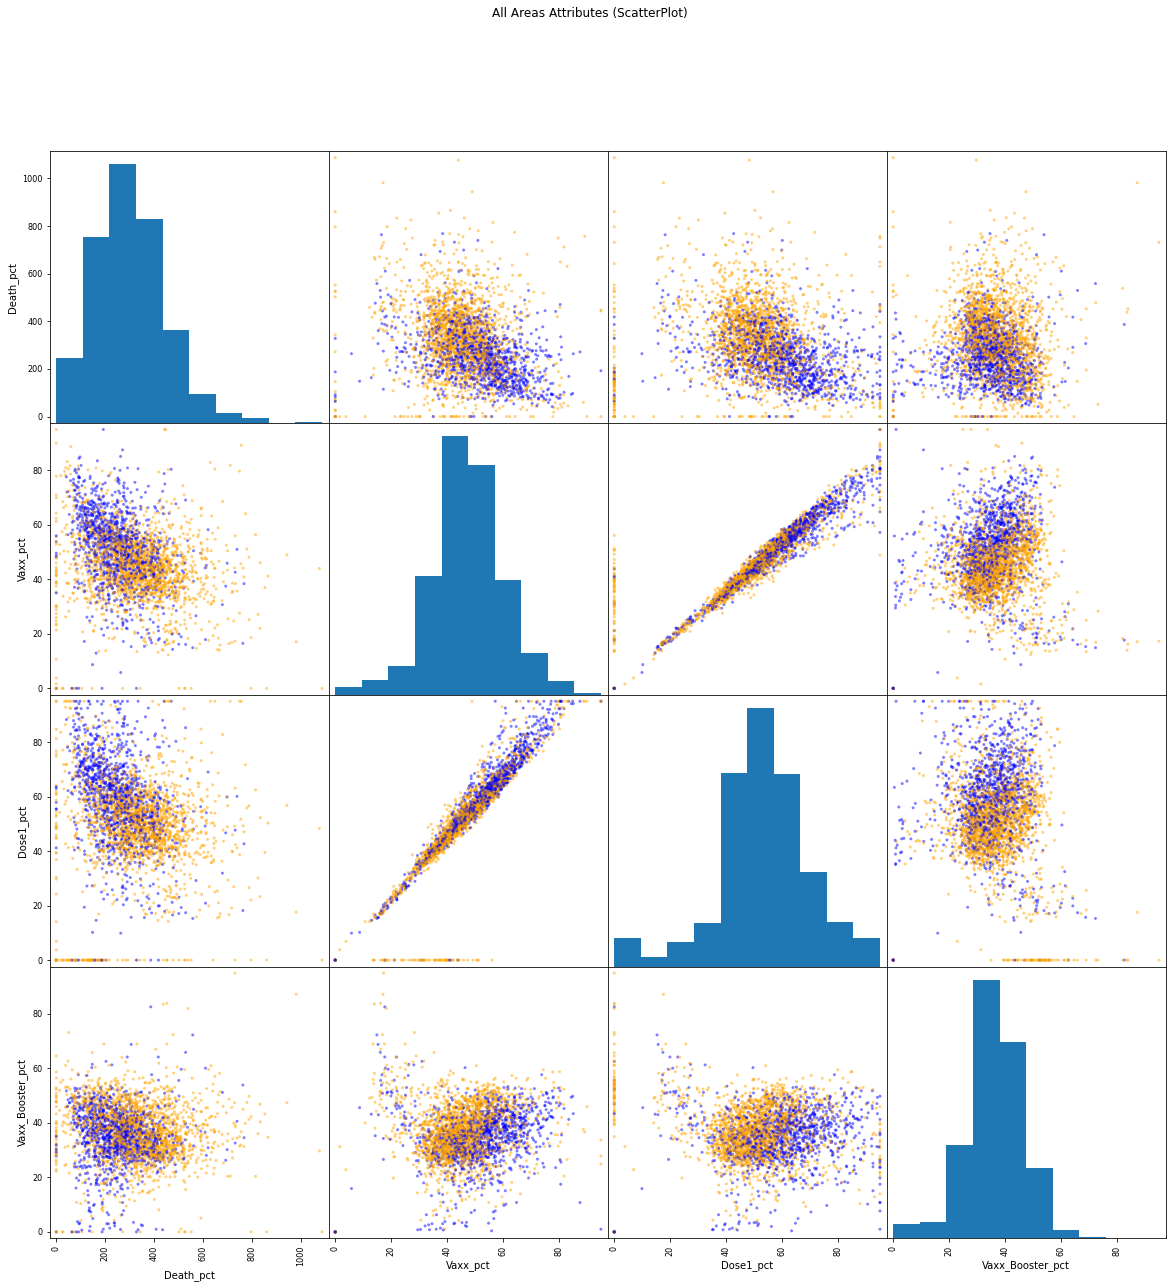

In [18]:
## 'Metro' = 1 (blue)
## 'Nonmetro' = 0 (orange)

##             -------Normal Datasets-------
pd.plotting.scatter_matrix( C19_View[Vaxx_Attributes], grid=True, figsize=(20,20),
                             c= C19_View['Metro_Status'].map({0:'orange', 1:'blue'}))


##             -------HOSPITAL BED ONLY-------
# pd.plotting.scatter_matrix( Estimate_C19_View[Hospital_Attributes_Est], grid=True, figsize=(20,20), marker='o')


plt.suptitle("All Areas Attributes (ScatterPlot)")

# plt.savefig(r"/Users/emmanueljumbo/dataScience/python/Dissertation/experimentation/graphs/figure_3.png")#This will create graph file in graph folder(Change names)

#                     What And Why:
# IDEA FROM= 
# https://www.geeksforgeeks.org/scatter-plot-matrix/
# https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

#### Non Metro Attributes (ScatterPlot)

Text(0.5, 0.98, 'Non Metro Attributes (ScatterPlot)')

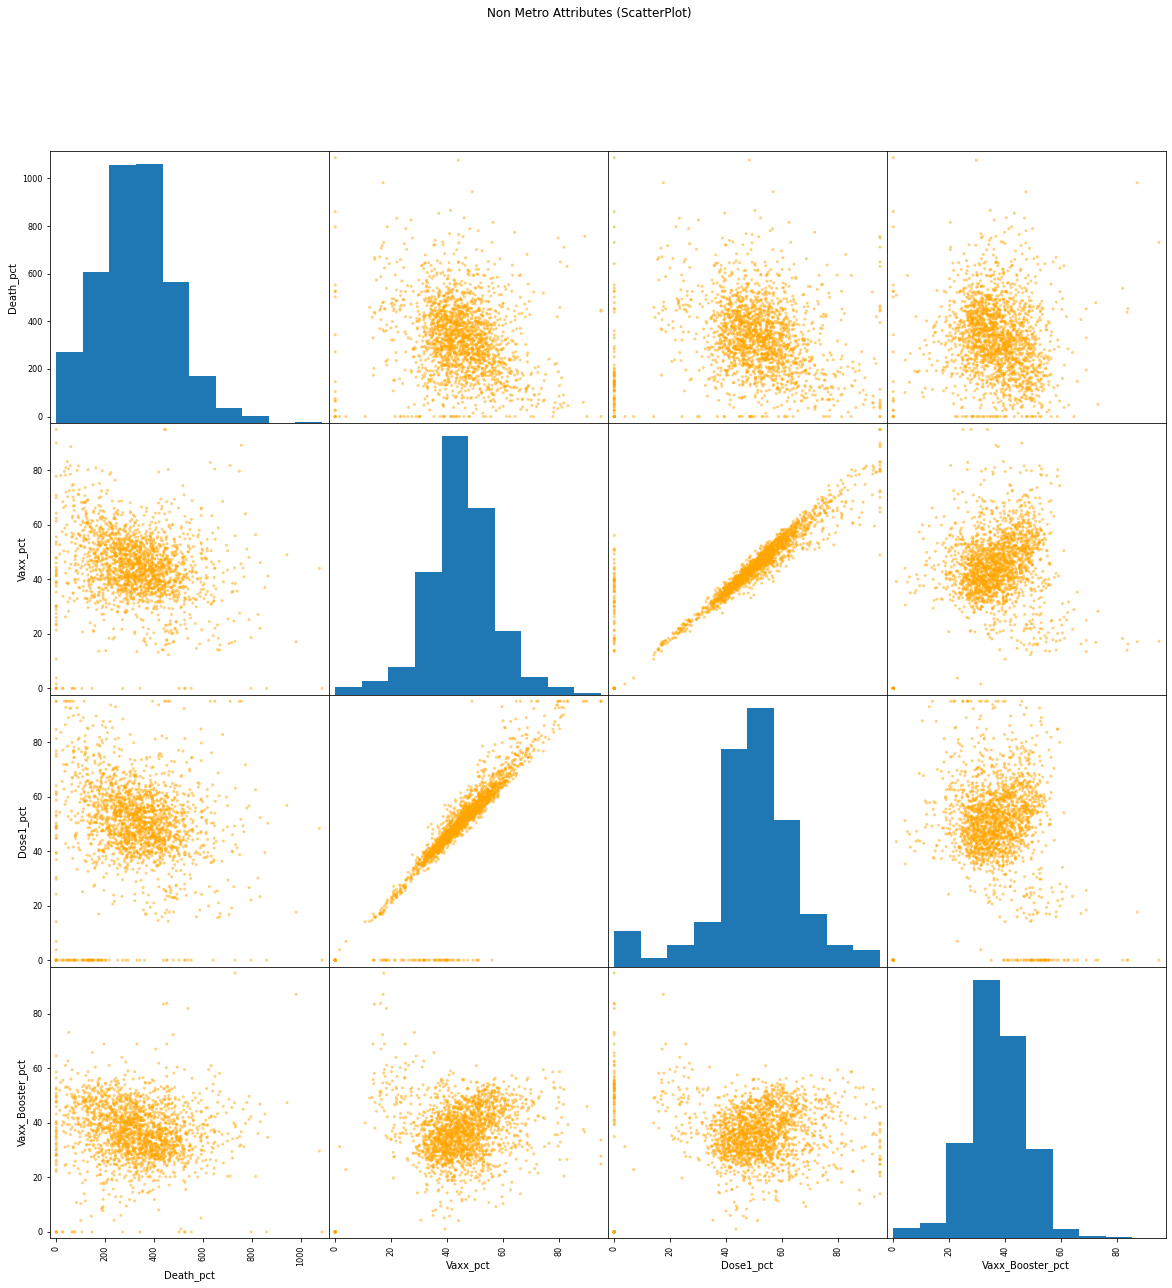

In [19]:
pd.plotting.scatter_matrix( NonMetro_View[Vaxx_Attributes], grid=True, figsize=(20,20),
                             c= NonMetro_View['Metro_Status'].map({0:'orange'}))

plt.suptitle("Non Metro Attributes (ScatterPlot)")

#### Metro Attributes (ScatterPlot)

Text(0.5, 0.98, 'Metro Attributes (ScatterPlot)')

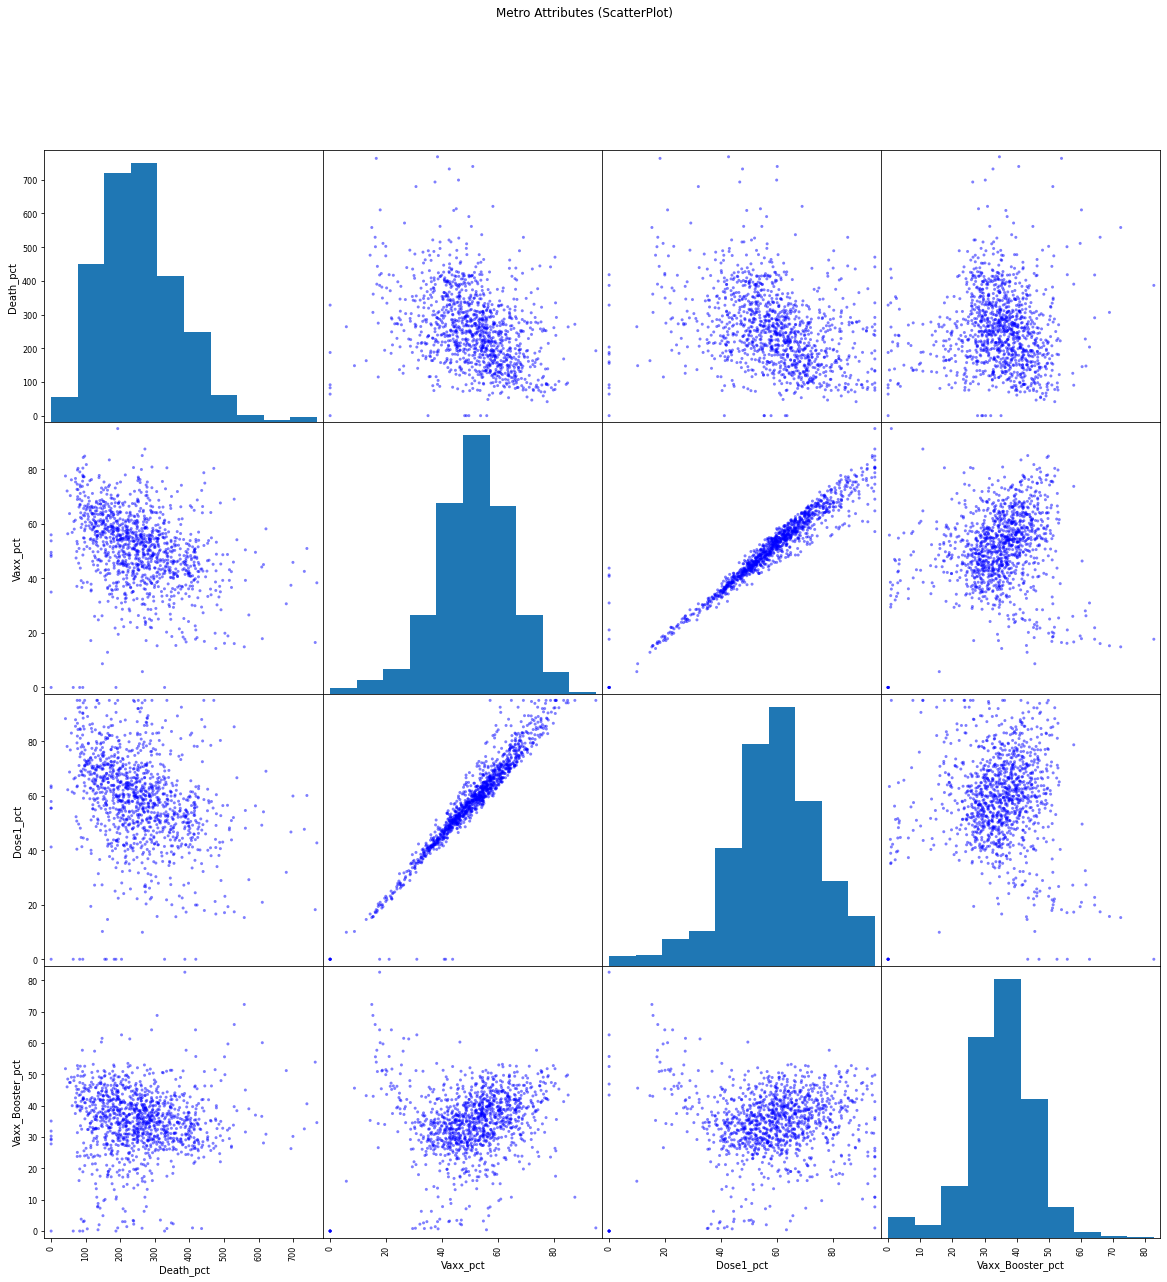

In [20]:
pd.plotting.scatter_matrix( Metro_View[Vaxx_Attributes], grid=True, figsize=(20,20),
                             c= Metro_View['Metro_Status'].map({1:'blue'}))
plt.suptitle("Metro Attributes (ScatterPlot)")

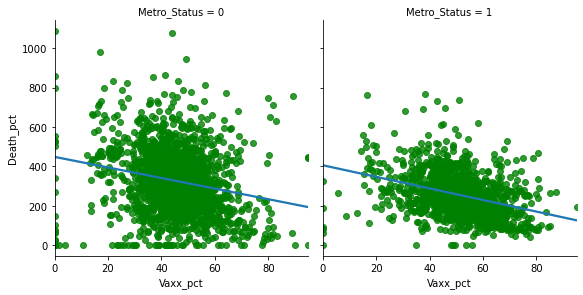

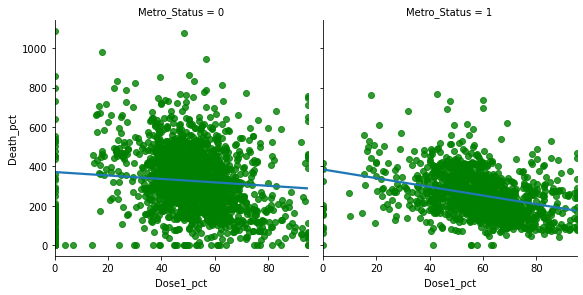

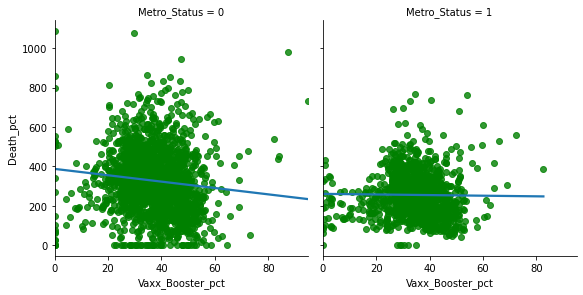

In [21]:
# #  Vaxx
Observation1a = sns.lmplot(x = 'Vaxx_pct', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
Observation1b = sns.lmplot(x = 'Dose1_pct', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
Observation1c = sns.lmplot(x = 'Vaxx_Booster_pct', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation2 = sns.lmplot(x = 'Lat', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# #  SVI
# Observation3 = sns.lmplot(x = 'Population_Density', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation3 = sns.lmplot(x = 'EP_POV', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation4 = sns.lmplot(x = 'EP_UNEMP', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation5 = sns.lmplot(x = 'EP_PCI', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation6 = sns.lmplot(x = 'EP_MINRTY', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation7 = sns.lmplot(x = 'EP_UNINSUR', y = 'Death_pct', data = C19_View, col = 'Metro_Status', height = 4, scatter_kws = {'color':'green'}, ci = False)               
# #  Bed VS Death
# Observation8 = sns.lmplot(x = 'Beds_utilization_Est', y = 'Death_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation9 = sns.lmplot(x = 'Bed_covid_utilization_Est', y = 'Death_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation10 = sns.lmplot(x = 'ICU_bed_Adult_UTIL_Est', y = 'Death_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation11 = sns.lmplot(x = 'ICU_bed_covid_Adult_UTIL_Est', y = 'Death_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# #  Bed VS Vaxx
# Observation12 = sns.lmplot(x = 'Beds_utilization_Est', y = 'Vaxx_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation13 = sns.lmplot(x = 'Bed_covid_utilization_Est', y = 'Vaxx_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation14 = sns.lmplot(x = 'ICU_bed_Adult_UTIL_Est', y = 'Vaxx_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               
# Observation15 = sns.lmplot(x = 'ICU_bed_covid_Adult_UTIL_Est', y = 'Vaxx_pct_Est', data = Estimate_C19_View, height = 4, scatter_kws = {'color':'green'}, ci = False)               

#                                                                'Death_pct_Est',
#                                                                'Vaxx_pct_Est',
#                                                                 Beds_utilization_Est
#                                                      (USE!!!)  'Bed_covid_utilization_Est',
#                                                                'ICU_bed_Adult_UTIL_Est',
#                                                      (USE!!!)  'ICU_bed_covid_Adult_UTIL_Est'


In [22]:
#                              OBSERVATION
# Death_pct VS Vaxx_pct
#     -In both Metro and non metro areas; ⭐️More Vax = Less Death. As counties with higher death rates
#      reduce as the rate of vaccinations increase (weak, negative relation between attribute).
#     -Higher rates of Vaccination(2 dose, 1 dose & booster) in Metro areas
#     -Higher rates of Death in NON metro Areas

# Death_pct VS lat
#     -In both Metro and non metro areas; ⭐️lower death rate at High latitudes. (Probably cause 
#      the higher latitude location is Alaska)
#     -Clustering of instances is simply focused in regions within USA mainland, while outliers 
#      represent counties in Alaska and USA overseas territories(eg. Guam)

# Death_pct VS Population_Density
#     -Higher rate of death in areas with lower Population_Density (this contridicts the popular assumption of
#     higher rates of death in areas with higher Population_Density & confirms assumption from "Death_pct VS Vaxx_pct")
#      Counties with higher death rates also have lower Population_Density
#     -Non Metro counties has less Population_Density

#                                      ---------Death VS SVI---------
# Death_pct VS EP_POV
#     -Death rate seems to increase as percent population below poverty increases.(tons of outlayier and 
#      increase of both variables, stop at a point)
#     -Has a +Correlation of 0.3
#     -Non Metro counties has slightly higher number of counties with percent population below poverty.
# Death_pct VS EP_UNEMP
#     -Death rate seems to increase as Unemployment Rate increases.(tons of outlayier and increase of both 
#      variables, stop at a point)
#     -Has a +Correlation of 0.2
#     -Non Metro counties has slightly higher Unemployment Rate
# Death_pct VS EP_PCI
#     -Death rate seems to decrease as Per capita income increases.(tons of outlayier and increase of both 
#      variables, stop at a point)
#     -Has a -Correlation of -0.4
#     -Metro counties has greater Per capita income 
#     -Confirms assumptions from "Death_pct VS EP_UNEMP & EP_POV"
# Death_pct VS EP_MINRTY
#     -Pattern for "all regions" and "metro" not found.
#     -(ONLY in NON METRO) Death rate increases as Percentage of Minority increases and even 
#      has a +Correlation of 0.2
# Death_pct VS EP_UNINSUR
#     -Death rate seems to increase as Percentage uninsured increases.(tons of outlayier and increase of both 
#      variables, stop at a point)
#     -Has a +Correlation of 0.3
#     -Confirms assumptions from "Death_pct VS EP_UNEMP, EP_POV & EP_PCI"

#                                      ---------Death VS Bed---------
# Death_pct VS Beds_utilization_Est
#     -As covid 19 deaths increases, general bed utilization also increases. As such states with higher 
#      death rates have a greater bed utilization
#     -Has a +Correlation of 0.159920
# Death_pct VS Bed_covid_utilization_Est
#     -As covid 19 deaths increases, bed utilization by suspected or confirmed COVID-19 patients also increases. 
#      As such states with higher death rates have a greater bed utilization by suspected or confirmed 
#      COVID-19 patients.
#     -Has a +Correlation of 0.514778
# Death_pct VS ICU_bed_Adult_UTIL_Est
#     -As covid 19 deaths increases, general ICU bed utilization also increases Slightly. As such states with higher 
#      death rates have a greater ICU bed utilization by general/ All patients.
#     -Has a +Correlation of 0.073137
# Death_pct VS ICU_bed_covid_Adult_UTIL_Est
#     -As covid 19 deaths increases, ICU bed utilization by suspected or confirmed COVID-19 patients also increases. 
#      As such states with higher death rates have a greater ICU bed utilization by suspected or confirmed COVID-19 patients.
#     -Has a +Correlation of 0.335296

#                                      ---------Vaxx VS Bed---------
# Vaxx_pct_Est VS Beds_utilization_Est
#     -VERY UNUSUAL. As vaccination percentage increases, general bed utilization also increases instead of reducing as 
#      would be expected. 
#     -Has a +Correlation of 0.357535
# Vaxx_pct_Est VS Bed_covid_utilization_Est
#     -As vaccination percentage increases, bed utilization by suspected or confirmed COVID-19 patients DECREASES.
#      As such states with higher vaccination percentage have lower bed utilization by suspected or confirmed COVID-19 patients.
#     -Has a -Correlation of -0.197857
# Vaxx_pct_Est VS ICU_bed_Adult_UTIL_Est
#     -As vaccination percentage increases, general ICU bed utilization by suspected or confirmed COVID-19 patients DECREASES.
#      As such states with higher vaccination percentage have lower general ICU bed utilization.
#     -Has a -Correlation of -0.194024
# Vaxx_pct_Est VS ICU_bed_covid_Adult_UTIL_Est
#     -As vaccination percentage increases, ICU bed utilization by suspected or confirmed COVID-19 patients DECREASES.
#      As such states with higher vaccination percentage have lower ICU bed utilization by suspected or 
#      confirmed COVID-19 patients.
#     -Has a -Correlation of -0.586848


# Heat Map (2D Histogram)

#### Metro Attributes HeatMap

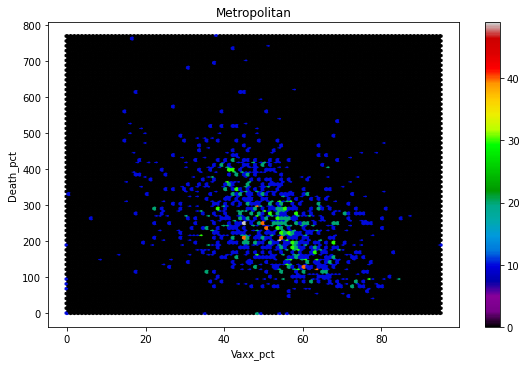

In [23]:
Y = Metro_View['Death_pct']
X = Metro_View['Vaxx_pct']


figure, axis = plt.subplots(figsize =(8, 5))


plt.hexbin(X, Y, bins = 50, cmap = plt.cm.nipy_spectral)
plt.colorbar()


axis.set_ylabel('Death_pct') 
axis.set_xlabel('Vaxx_pct') 

# #------UNCOMMENT ME & SET VALUE------
# # Limits X&Y-axis to ensure that any graph created shares 
# # the same X&Y axis range, regardless of the variables used 
# plt.xlim(-1, 96)
# plt.ylim(-1, 1100)



plt.tight_layout() 
plt.title( "Metropolitan" )
plt.show()


#                     What And Why:
# Used to visualise the relationship between two attribute. Points on the graph with higher 
# frequencies are marked with more intense colors(red).
# IDEA FROM= 
#https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/
#Limit X&Y-axis= https://www.geeksforgeeks.org/how-to-set-axis-ranges-in-matplotlib/

#### Non Metro Attributes HeatMap

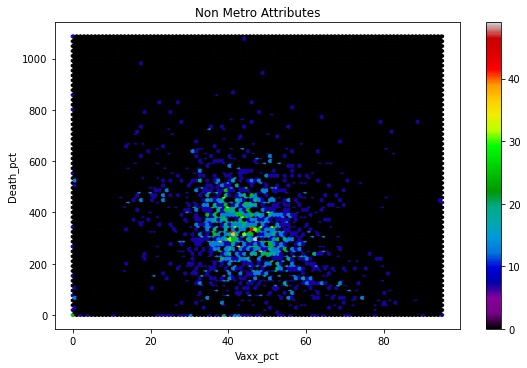

In [24]:
Y = NonMetro_View['Death_pct']
X = NonMetro_View['Vaxx_pct']


# figure, axis = plt.subplots(figsize =(10, 7))
figure, axis = plt.subplots(figsize =(8, 5))


plt.hexbin(X, Y, bins = 50, cmap = plt.cm.nipy_spectral)
plt.colorbar()



axis.set_ylabel('Death_pct') 
axis.set_xlabel('Vaxx_pct') 

# #------UNCOMMENT ME------
# # Limits X&Y-axis to ensure that any graph created shares 
# # the same X&Y axis range, regardless of the variables used 
# plt.xlim(-1, 96)
# plt.ylim(-1, 1100)


plt.tight_layout() 
plt.title( "Non Metro Attributes" )
plt.show()


#                     What And Why:
# Used to visualise the relationship between two attribute. Points on the graph with higher 
# frequencies are marked with more intense colors(red).
# IDEA FROM= 
#https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/
#Limit X&Y-axis= https://www.geeksforgeeks.org/how-to-set-axis-ranges-in-matplotlib/

# KDE Plot
Kernel Density Estimate

#### Metro Attributes KDE

Text(0.5, 1.0, 'Metropolitan')

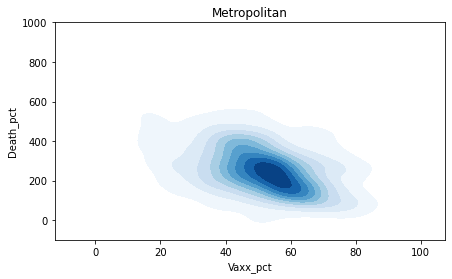

In [44]:
Y = Metro_View['Death_pct']
X = Metro_View['Vaxx_pct']



figure, ax = plt.subplots(figsize =(7, 4))


# #------UNCOMMENT ME & SET VALUE------
# # Limits X&Y-axis to ensure that any graph created shares 
# # the same X&Y axis range, regardless of the variables used 
# ax.set_xlim(-10, 60)
# ax.set_ylim(-100, 1200)
# ax.set_xlim(5000, 70000)
# ax.set_ylim(-100, 1000)
# ax.set_xlim(-15, 110)
# ax.set_ylim(-100, 1000)
# ax.set_xlim(-3, 35)
ax.set_ylim(-100, 1000)

sns.kdeplot(x= X,
            y= Y,
            shade=True, cmap="Blues") 

plt.title( "Metropolitan" )


#                     What And Why:
# IDEA FROM= 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
#Limit X&Y-axis= https://www.geeksforgeeks.org/how-to-set-axes-labels-limits-in-a-seaborn-plot/

#### Non Metro Attributes KDE

Text(0.5, 1.0, 'Non metropolitan')

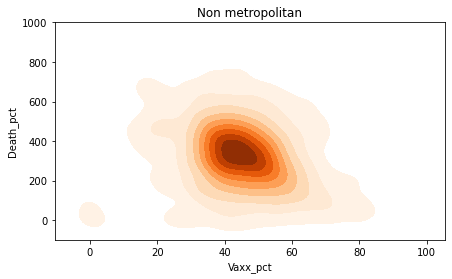

In [43]:
Y = NonMetro_View['Death_pct']
X = NonMetro_View['Vaxx_pct']


figure, ax = plt.subplots(figsize =(7, 4))


# #------UNCOMMENT ME & SET VALUE------
# # Limits X&Y-axis to ensure that any graph created shares 
# # the same X&Y axis range, regardless of the variables used 
# ax.set_xlim(-10, 60)
# ax.set_ylim(-100, 1200)
# ax.set_xlim(-3, 35)
# ax.set_ylim(-100, 1000)
# ax.set_xlim(5000, 70000)
# ax.set_ylim(-100, 1000)
# ax.set_xlim(-15, 110)
ax.set_ylim(-100, 1000)

sns.kdeplot(x= X,
            y= Y,
            shade=True, cmap="Oranges") 

plt.title( "Non metropolitan" )



#                     What And Why:
# IDEA FROM= 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
#Limit X&Y-axis= https://www.geeksforgeeks.org/how-to-set-axes-labels-limits-in-a-seaborn-plot/

# Correlation Matrix

#### All Area Attributes Matrix

In [27]:
# Hospital_Matrix = C19_View[Hospital_Attributes].corr()
Hospital_Matrix_Estimate = Estimate_C19_View[Hospital_Attributes_Est].corr()
SVI_Matrix = C19_View[SVI_Attributes].corr()
Other_Matrix = C19_View[Other_Attributes].corr()
Vaxx_Matrix = C19_View[Vaxx_Attributes].corr()


Vaxx_Matrix
# Other_Matrix
# Hospital_Matrix_Estimate
# Hospital_Matrix
# SVI_Matrix

,Death_pct,Vaxx_pct,Dose1_pct,Vaxx_Booster_pct
Death_pct,1.000000,-0.295990,-0.210971,-0.055244
Vaxx_pct,-0.295990,1.000000,0.918877,0.137558
Dose1_pct,-0.210971,0.918877,1.000000,-0.053853
Vaxx_Booster_pct,-0.055244,0.137558,-0.053853,1.000000


#### Metro Attributes Matrix

In [28]:
Metro_Hospital_Matrix = Metro_View[Hospital_Attributes].corr()
Metro_SVI_Matrix = Metro_View[SVI_Attributes].corr()
Metro_Other_Matrix = Metro_View[Other_Attributes].corr()
Metro_Vaxx_Matrix = Metro_View[Vaxx_Attributes].corr()

# Metro_Hospital_Matrix
# Metro_SVI_Matrix
# Metro_Other_Matrix
Metro_Vaxx_Matrix

,Death_pct,Vaxx_pct,Dose1_pct,Vaxx_Booster_pct
Death_pct,1.000000,-0.353613,-0.322700,-0.014345
Vaxx_pct,-0.353613,1.000000,0.959391,0.155856
Dose1_pct,-0.322700,0.959391,1.000000,0.012919
Vaxx_Booster_pct,-0.014345,0.155856,0.012919,1.000000


#### Non Metro Attributes Matrix

In [29]:
NonMetro_Hospital_Matrix = NonMetro_View[Hospital_Attributes].corr()
NonMetro_SVI_Matrix = NonMetro_View[SVI_Attributes].corr()
NonMetro_Other_Matrix = NonMetro_View[Other_Attributes].corr()
NonMetro_Vaxx_Matrix = NonMetro_View[Vaxx_Attributes].corr()

# NonMetro_Hospital_Matrix
# NonMetro_SVI_Matrix
# NonMetro_Other_Matrix
NonMetro_Vaxx_Matrix

,Death_pct,Vaxx_pct,Dose1_pct,Vaxx_Booster_pct
Death_pct,1.000000,-0.214538,-0.093530,-0.109246
Vaxx_pct,-0.214538,1.000000,0.886556,0.169980
Dose1_pct,-0.093530,0.886556,1.000000,-0.057531
Vaxx_Booster_pct,-0.109246,0.169980,-0.057531,1.000000


# Time Series Line Graph

#### SETUP
* List of Relevant Attributes
* Create Dataset copies
* Modify one dataset copy (Date, rename)
* Merge dataset copies
* Calculate Non Cummulative rows
* Drop columns & clean up New dataset


In [30]:
# List of Relevant Attributes
Cumulative_Attributes = ['Date', 'State','County','Metro_Status',
                    'Confirmed_Cases', 'Deaths', 'Series_Complete_Yes', 'Administered_Dose1_Recip',
                    'Booster_Doses', 'inpatient_beds_utilization_numerator', 'inpatient_beds_utilization_denominator',
                    'percent_of_inpatients_with_covid_numerator',
                    'adult_icu_bed_covid_utilization_numerator', 'adult_icu_bed_utilization_denominator', 
                    'adult_icu_bed_utilization_numerator']

# Create Two copies of My final Dataset
COVID19_Daily0 = COVID19_US[Cumulative_Attributes].copy() #Date Not Modified
COVID19_Daily1 = COVID19_US[Cumulative_Attributes].copy() #Date Modified


# --------Modified Dataset----------
# Add 1 day to the Date of one of my dataset copies 
# (Note: This doesnt change the values attached to each specific date row)
COVID19_Daily1['Date_+_1'] = COVID19_Daily1['Date'] + pd.Timedelta(days=1)


# --------Modified Dataset----------
# Change name of columns for easy identification and use 
COVID19_Daily1.rename(columns={'Confirmed_Cases': 'Cases_+_1', 'Deaths': 'Deaths_+_1', 'Series_Complete_Yes': 'Vaxx_+_1',
                           'Administered_Dose1_Recip': 'Dose1_+_1', 'Booster_Doses': 'Vaxx_Booster_+_1',
                            'inpatient_beds_utilization_numerator': 'Beds_used',
                           'inpatient_beds_utilization_denominator': 'All_beds', 
                            'percent_of_inpatients_with_covid_numerator': 'Beds_used_Covid',
                          'adult_icu_bed_covid_utilization_numerator': 'ICU_bed_Covid', 
                          'adult_icu_bed_utilization_denominator': 'All_ICU_beds', 
                          'adult_icu_bed_utilization_numerator': 'ICU_beds_used'}, inplace=True)


# Merge both modified and unmodified Dataset copies
COVID19_Daily_final = COVID19_Daily0.merge(COVID19_Daily1[['Date_+_1', 'State','County','Metro_Status',
                                                          'Cases_+_1', 'Deaths_+_1', 'Vaxx_+_1', 
                                                           'Dose1_+_1', 'Vaxx_Booster_+_1', 'Beds_used',
                                                           'All_beds', 'Beds_used_Covid', 'ICU_bed_Covid',
                                                           'All_ICU_beds', 'ICU_beds_used']],
                     how = 'left',
                     left_on = ['Date', 'State','County'], 
                     right_on = ['Date_+_1', 'State','County'])


# Subtract present day's values from yesterday's values
COVID19_Daily_final['Cases_Daily'] = COVID19_Daily_final['Confirmed_Cases'] - COVID19_Daily_final['Cases_+_1']
COVID19_Daily_final['Deaths_Daily'] = COVID19_Daily_final['Deaths'] - COVID19_Daily_final['Deaths_+_1']
COVID19_Daily_final['Vaxx_Daily'] = COVID19_Daily_final['Series_Complete_Yes'] - COVID19_Daily_final['Vaxx_+_1']
COVID19_Daily_final['Dose1_Daily'] = COVID19_Daily_final['Administered_Dose1_Recip'] - COVID19_Daily_final['Dose1_+_1']
COVID19_Daily_final['Vaxx_Booster_Daily'] = COVID19_Daily_final['Booster_Doses'] - COVID19_Daily_final['Vaxx_Booster_+_1']
COVID19_Daily_final['Beds_used_Daily'] = COVID19_Daily_final['inpatient_beds_utilization_numerator'] - COVID19_Daily_final['Beds_used']
COVID19_Daily_final['All_beds_Daily'] = COVID19_Daily_final['inpatient_beds_utilization_denominator'] - COVID19_Daily_final['All_beds']
COVID19_Daily_final['Beds_used_Covid_Daily'] = COVID19_Daily_final['percent_of_inpatients_with_covid_numerator'] - COVID19_Daily_final['Beds_used_Covid']
COVID19_Daily_final['ICU_bed_used_Covid_Daily'] = COVID19_Daily_final['adult_icu_bed_covid_utilization_numerator'] - COVID19_Daily_final['ICU_bed_Covid']
COVID19_Daily_final['All_ICU_beds_Daily'] = COVID19_Daily_final['adult_icu_bed_utilization_denominator'] - COVID19_Daily_final['All_ICU_beds']
COVID19_Daily_final['ICU_beds_used_Daily'] = COVID19_Daily_final['adult_icu_bed_utilization_numerator'] - COVID19_Daily_final['ICU_beds_used']


# UPDATE New Column 2020-01-22 Values 
COVID19_Daily_final['Cases_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['Confirmed_Cases']
COVID19_Daily_final['Deaths_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['Deaths']
COVID19_Daily_final['Vaxx_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['Series_Complete_Yes']
COVID19_Daily_final['Dose1_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['Administered_Dose1_Recip']
COVID19_Daily_final['Vaxx_Booster_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['Booster_Doses']
COVID19_Daily_final['Beds_used_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['inpatient_beds_utilization_numerator']
COVID19_Daily_final['All_beds_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['inpatient_beds_utilization_denominator']
COVID19_Daily_final['Beds_used_Covid_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['percent_of_inpatients_with_covid_numerator']
COVID19_Daily_final['ICU_bed_used_Covid_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['adult_icu_bed_covid_utilization_numerator']
COVID19_Daily_final['All_ICU_beds_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['adult_icu_bed_utilization_denominator']
COVID19_Daily_final['ICU_beds_used_Daily'].loc[COVID19_Daily_final['Date'] == '2020-01-22'] = COVID19_Daily_final['adult_icu_bed_utilization_numerator']


# DROP Columns No longer needed
COVID19_Daily_final = COVID19_Daily_final.drop(COVID19_Daily_final.loc[:, "Confirmed_Cases":"ICU_beds_used"].columns, axis = 1)




#                     What And Why:
# The entire idea behind this, is Subtracting a current day's column value from the column value of a previous day. 
# NOTE: 'Date' is only manipulated to allow values from previous day to align with current day values (same row),
# this ensure easy subtraction.
# -------EXAMPLE:-------
# 2020-01-22 Confirmed cases = 1.0
# 2020-01-23 Confirmed cases = 9.0
# Actual daily Confirmed cases => 9-1 = 8.0
# ----------------------
# THEN UPDATE/Replace the New Column's 2020-01-22 Values which are currently NULL; with the values went for that date
# (values actually meant for 2020-01-22 were gotten from "ORIGINAL Columns")


###################################################################################
#  C19_View['inpatient_beds_utilization_numerator'] = inpatient_beds_used
#  C19_View['inpatient_beds_utilization_denominator'] = inpatient_beds

# C19_View['percent_of_inpatients_with_covid_numerator'] = inpatient_beds_used_covid
#  C19_View['percent_of_inpatients_with_covid_denominator'] = inpatient_beds_used

# C19_View['inpatient_bed_covid_utilization_numerator'] = inpatient_beds_used_covid
# C19_View['inpatient_bed_covid_utilization_denominator'] = inpatient_beds


# C19_View['adult_icu_bed_covid_utilization_numerator'] = 'staffed_icu_adult_patients_confirmed_and_suspected_covid'
# C19_View['adult_icu_bed_covid_utilization_denominator'] = total_staffed_adult_icu_beds 

# C19_View['adult_icu_bed_utilization_numerator'] = staffed_adult_icu_bed_occupancy
# C19_View['adult_icu_bed_utilization_denominator'] = total_staffed_adult_icu_beds
###################################################################################


/Users/emmanueljumbo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
COVID19_Daily_final.tail()

,Date,State,County,Metro_Status_x,Cases_Daily,Deaths_Daily,Vaxx_Daily,Dose1_Daily,Vaxx_Booster_Daily,Beds_used_Daily,All_beds_Daily,Beds_used_Covid_Daily,ICU_bed_used_Covid_Daily,All_ICU_beds_Daily,ICU_beds_used_Daily
2241955,2022-01-04,Wyoming,Sweetwater,Nonmetro,36.0,3.0,62.0,53.0,107.0,699.0,1598.0,67.0,17.0,137.0,60.0
2241956,2022-01-04,Wyoming,Teton,Nonmetro,179.0,0.0,7.0,33.0,27.0,699.0,1598.0,67.0,17.0,137.0,60.0
2241957,2022-01-04,Wyoming,Uinta,Nonmetro,18.0,3.0,16.0,23.0,33.0,699.0,1598.0,67.0,17.0,137.0,60.0
2241958,2022-01-04,Wyoming,Washakie,Nonmetro,6.0,2.0,2.0,7.0,3.0,699.0,1598.0,67.0,17.0,137.0,60.0
2241959,2022-01-04,Wyoming,Weston,Nonmetro,0.0,2.0,10.0,12.0,38.0,699.0,1598.0,67.0,17.0,137.0,60.0


In [32]:
COVID19_Daily_final.shape

(2241960, 15)

### Remove OUTLlER

In [33]:
##               ----- FOR IDENTIFYING OUTLERIERS ----
temporalData_Outlier = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Daily'] < 0]
## temporalData_Outlier2 = COVID19_Daily_final[COVID19_Daily_final['Cases_Daily'] > 2500]

##               ----- SAVING NEW Outler-Free Dataset -----
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Cases_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Deaths_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Dose1_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Booster_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Beds_used_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['All_beds_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Beds_used_Covid_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['ICU_bed_used_Covid_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['All_ICU_beds_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['ICU_beds_used_Daily'] >= 0]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Daily'] < 20000]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Deaths_Daily'] < 1200]
COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Booster_Daily'] < 300000]


## DELETE AFTER USE (RURAL STATE)
# COVID19_Daily_final = COVID19_Daily_final[COVID19_Daily_final['Vaxx_Daily'] < 1500]




## temporalData_Outlier2 = temporalData[temporalData['Cases_Daily'] > 10000]
## temporalData_Outlier3 = temporalData[temporalData['Vaxx_Daily'] > 74]


### Specify Location
   INSTRUCTION: Uncomment only One "temporalData" variable at a time To Get its diagram 


In [34]:

## FOR COUNTY Line Plot (Vaxx_Daily VS Deaths_Daily)
## <NON-METRO County>
# temporalData = COVID19_Daily_final[(COVID19_Daily_final["County"] == "McClain") & (COVID19_Daily_final["State"] == "Oklahoma")]
## <METRO County>
temporalData = COVID19_Daily_final[(COVID19_Daily_final["County"] == "Queens") & (COVID19_Daily_final["State"] == "New York")]


## FOR STATE Line Plot (Vaxx_Daily VS All BED Variables)
## <NON-METRO state>
# temporalData = COVID19_Daily_final[(COVID19_Daily_final["State"] == "Vermont")]
# temporalData = COVID19_Daily_final[(COVID19_Daily_final["State"] == "Oklahoma")]
## <METRO state>
# temporalData = COVID19_Daily_final[(COVID19_Daily_final["State"] == "New York")]


# print(" shape\n", temporalData.shape)
# temporalData.head()


#### Line Plot (Vaxx_Daily VS Deaths_Daily)

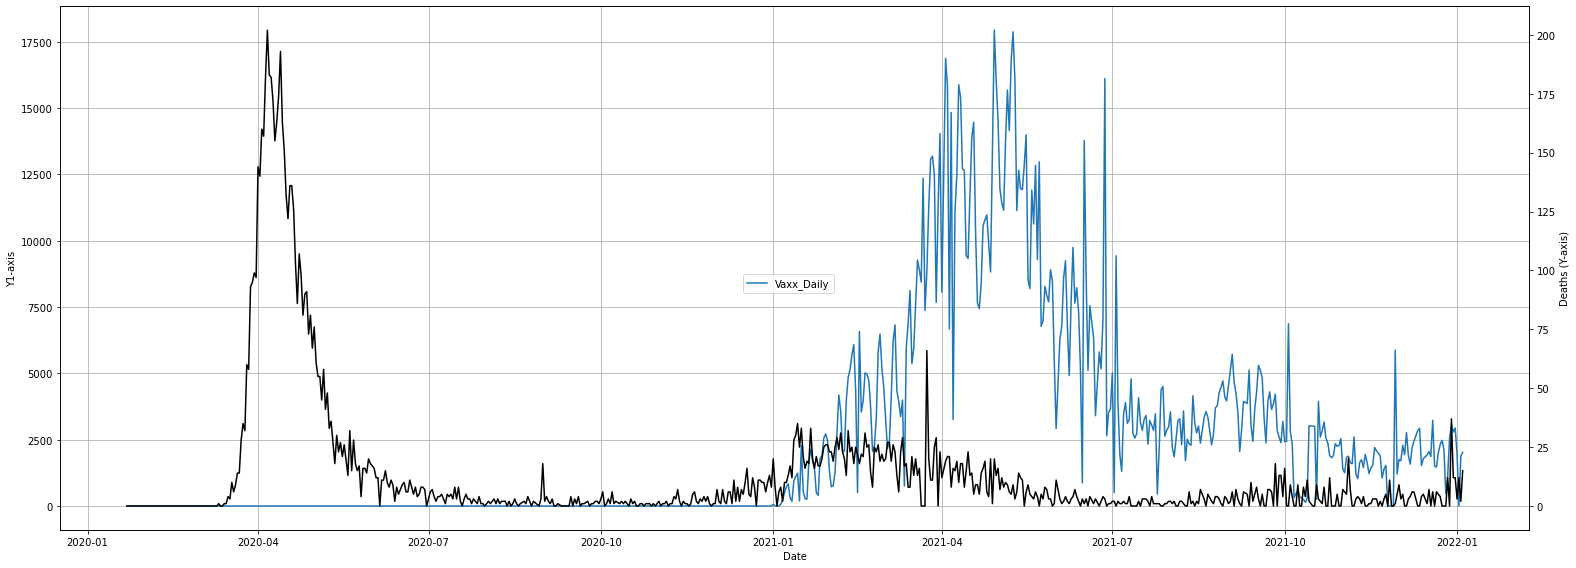

In [35]:
Test1 = ['Vaxx_Daily']


X = temporalData['Date']
Y1 = temporalData[Test1]
Y2 = temporalData['Deaths_Daily']


figure, ax = plt.subplots(figsize =(22, 8))

# Create/ Plot two Y-Axis & one X-Axis
ax2 = ax.twinx()
ax.plot(X, Y1)               # Y1
ax2.plot(X, Y2, color = 'k') # Y2 AKA death (the black line on the graph)
# Axis Labels
ax.set_xlabel('Date')
ax.set_ylabel('Y1-axis')
ax2.set_ylabel('Deaths (Y-axis)')
# Other graph stuff
plt.tight_layout()          # Just makes lines Sharper
ax.figure.legend(Y1, loc='center')
ax.grid(True)
plt.show()


#IMPORTANT => Manually add 'Deaths_Daily' to the "legend" when you take a screenshot (Deaths_Daily is the black line on the graph)
#
#                       What And Why:
# *The reason for creating this graph is to view the relation between multiple variables over a period of time (when they are in sync or not)
# *Secound Y-axis was added because the range of values of the Deaths_Daily variable is different(lower than) from 
#  other variables on the graph and as such the variable is bearly visible.
#IDEA FROM= https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/


#### Line Plot (Vaxx_Daily VS All bed Variables)

Text(0, 0.5, 'Y-axis')

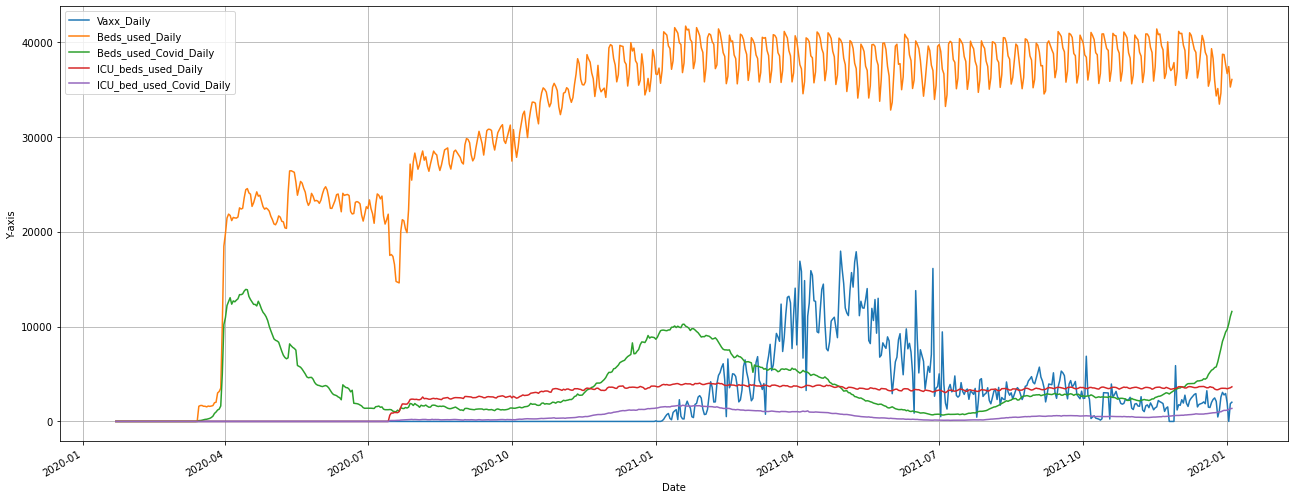

In [36]:
Test2 = ['Vaxx_Daily', 'Beds_used_Daily', 'Beds_used_Covid_Daily', 'ICU_beds_used_Daily', 'ICU_bed_used_Covid_Daily']


X = temporalData['Date']
# Y = temporalData['Deaths_Daily']
Y = temporalData[Test2]
# Y = temporalData[Test2]


figure = plt.subplots(figsize =(22, 8))
plt.plot(X, Y)

plt.legend(Y)
plt.grid(True)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Y-axis')

In [37]:
##                                  ----- Observation ----



#     -According to {https://www.nejm.org/doi/full/10.1056/NEJMoa2118691} the lag between getting vaccined(all doses) 
#      and building immunity is between 7 and 14 days.


##                                <<<<<< METRO County(Queens) >>>>>>
# Vaxx_Daily VS Deaths_Daily
#     -Based on the diagram; the introduction of vaccines(blue line) appears to have curtailed a potential increase 
#      in daily death(black line) due to covid, between the periodes of 2021-01 and 2021-04. 
# Vaxx_Daily VS All bed Variables
#     -Based on the diagram; the introduction of vaccines(blue line) appears to have:
#          *Lead to a decrease in the daily number of 'Beds_used_Covid_Daily'(Green line) between the periods
#           of 2021-01 and 2021-07.
#          *Lead to a decrease in the daily number of ICU beds occupied by suspected or confirmed COVID-19 patients 
#           (purple line), between the periods of 2021-01 and 2021-07.
#          *little to no visible effect on daily general ICU beds usage(Red line)
#          *little to no visible effect on daily 'Beds_used_Daily'(Orange line)

##                                <<<<<< NON-METRO County() >>>>>>
# Vaxx_Daily VS Deaths_Daily
#     - Similar Pattern
# Vaxx_Daily VS All bed Variables
#     - Similar Pattern 


# Export CSV File

In [38]:
# C19_View.to_csv("/Users/emmanueljumbo/dataScience/python/Dissertation/experimentation/data/ML_Ultimate_Covid19_DataSet.csv")




#                     What And Why:
# New dataset will be used for Covid data visualisation, exploration and creation of machine learning models in other “.ipynb” files. 
# IDEA FROM=
# https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/